1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.   This  table  includes:
* name:  the  user's  name
* object_id:   the  user's  id
* email:  email  address
* creation_source:   how  their  account  was  created.  This  takes  on  one
  of  5  values:
       *PERSONAL_PROJECTS:  invited  to  join  another  user's
        personal  workspace
       *GUEST_INVITE:  invited  to  an  organization  as  a  guest
       (limited  permissions)
       *ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
       *SIGNUP:  signed  up  via  the  website
       *SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
        Authentication  (using  a  Google  email  account  for  their  login
        id)
* creation_time:  when  they  created  their  account
* last_session_creation_time:   unix  timestamp  of  last  login
* opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
  marketing  emails
* enabled_for_marketing_drip:  whether  they  are  on  the  regular
  marketing  email  drip
* org_id:   the  organization  (group  of  users)  they  belong  to
* invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).



2]  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .



We  suggest  spending  1-2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [2]:
users = pd.read_csv('takehome_users.csv', encoding = 'latin-1')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [5]:
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [6]:
#Clean users
#There are a number of features in the users df that are can be dropped as they are not important. 
#drop Name and Email

users.drop(['name', 'email'],axis = 1, inplace = True)
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
#convert last session creation time to datetime
users['last_session_creation_time']=pd.to_datetime(users['last_session_creation_time'],unit='s')

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 750.1+ KB


In [9]:
#convert creation_time to datetime
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [10]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [12]:
#fillna values with 0
users.fillna(0,inplace = True)

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  12000 non-null  object        
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 750.1+ KB


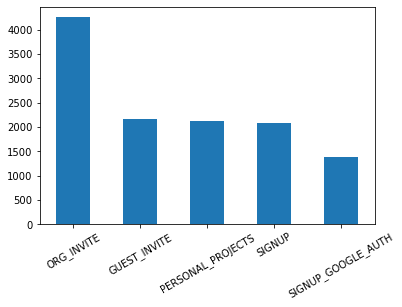

In [14]:
#EDA on users

fig = users['creation_source'].value_counts().plot.bar()
plt.xticks(rotation=30)
plt.show()

Org_invite is where the most users are created 

In [15]:
#create adopted user column
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [16]:
dates=[]
for x in user_engagement['time_stamp']:
    dates.append(x.date())

In [17]:
user_engagement['time_stamp'] = dates

In [18]:
def calculate_adopted(user_id):
    adopted_user = 0
    #check if user_id is in user_engagement table
    if user_id in user_engagement['user_id'].unique():
        log_ins = user_engagement[user_engagement['user_id'] == user_id].reset_index()
        if(len(log_ins) >= 3):
            #loop through from beginning to third from last
            for idx,val in enumerate(log_ins['time_stamp'][:-2]):
                next_index = idx+2
                if((log_ins['time_stamp'][next_index] - val).days <= 7):
                    adopted_user = 1
    return adopted_user

In [19]:
adopted = []

for idx,val in enumerate(users['object_id']):
    adopted.append(calculate_adopted(val))

In [20]:
users['adopted'] = adopted

In [21]:
users

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,SIGNUP,2012-12-20 13:24:32,0,1,37,0.0,0
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,0,1,1,74,0.0,0
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,0,0,0,302,0.0,0
9,10,2013-01-16 22:08:03,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1


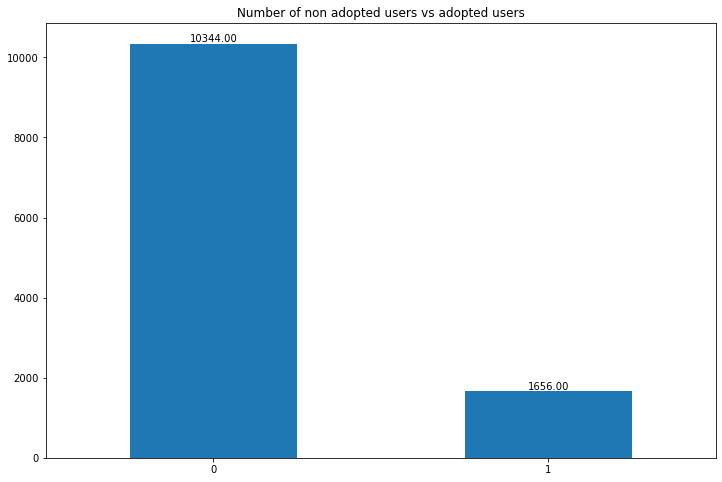

In [22]:
plt.figure(figsize=(12,8))
fig = users['adopted'].value_counts().plot.bar()
plt.xticks(rotation=0)

plt.title('Number of non adopted users vs adopted users')
rects = fig.patches

for rect in rects:
        height = rect.get_height()
        fig.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')
plt.show()

majority of users are non adopted. Only 1656 users are adopted

# Modeling

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [109]:
users.index = users['object_id']
users.drop('object_id',axis = 1,inplace = True)

KeyError: 'object_id'

In [124]:
#scale data
x = users.drop(['creation_time','last_session_creation_time','adopted'],axis = 1)
y = users['adopted']

In [125]:
# Define which columns should be encoded vs scaled
columns_to_encode = ['creation_source']

encoded_x =    pd.get_dummies(x[columns_to_encode])
# Concatenate (Column-Bind) Processed Columns Back Together
x.drop('creation_source',axis = 1,inplace = True)
scaled_df = np.concatenate([x,encoded_x], axis=1)

In [126]:
encoded_x

,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,0,0,0,1,0
8,0,0,1,0,0
9,0,0,1,0,0


In [127]:
scaled_df.shape

(12000, 9)

In [128]:
scaled_df

array([[ 1.,  0., 11., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., 94., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1., 83., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.]])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2,random_state=5)

In [130]:
X_train.shape

(9600, 9)

In [117]:
lr = RandomForestClassifier()
lr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [132]:
param_grid = [
    { 'n_estimators': [1,10,100,500,1000],
    'max_depth': np.linspace(1, 32, 32, endpoint=True),
    'max_features': list(range(1,X_train.shape[1]))}
]

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, n_jobs=-1)    

rf_grid.fit(X_train,y_train)

print(rf_grid.best_estimator_)

rf_model = rf_grid.best_estimator_

#predict on train and test set
y_pred_train = rf_model.predict(X_train) 
y_pred_test = rf_model.predict(X_test) 

print(rf_model.score(X_train,y_train))
print(rf_model.score(X_test,y_test))

RandomForestClassifier(max_depth=5.0, max_features=5, n_estimators=10)
0.8611458333333334
0.8654166666666666


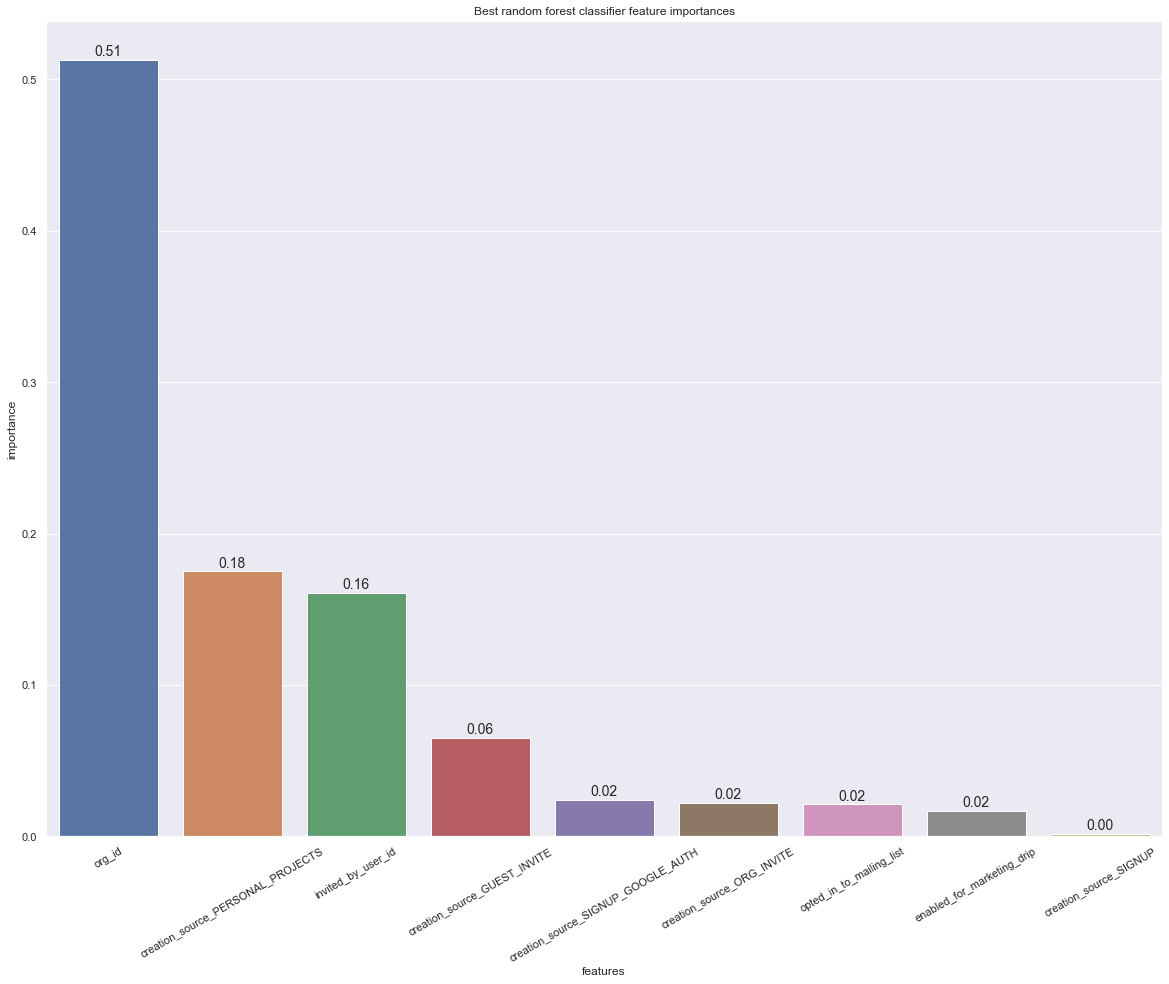

In [133]:
plt.subplots(figsize=(20, 15))
ax = plt.subplot()
sns.set(rc={'figure.figsize':(20,16)})

columns = ['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id',
           'creation_source_GUEST_INVITE','creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS','creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH']

imps = rf_grid.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=columns).sort_values(ascending=False)
plots = sns.barplot(x = rf_feat_imps.index, y = rf_feat_imps)
plt.xlabel('features')
plt.ylabel('importance')
plt.xticks(rotation=30)
plt.title('Best random forest classifier feature importances')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, 8),
                   textcoords='offset points')

I ran a Random Forest gridsearchcv on the training set and  found the best parameters to be max_depth=5.0, max_features=5 and n_estimators=10)

My model score for the training set was 0.86 and 0.87 on the test set, since both scores are similar my model is not overfitting or underfitting on the training set

The features that predict adopted user is overwhelmingly organization id at 51% then 18% for personal projects under creation source and 16% for invited by user

Overall, I am happy with how my model performed, I believe that with feature engineering or with additional data, the features could be better tuned to predict adopted user. Right now we dont have a feature that tracks how often they logged into the app. 

Maybe we could add a # of logins in last 30 days feature to add some usage history to our dataset